Source: https://www.lucypark.kr/courses/2015-ba/text-mining and https://www.lucypark.kr/slides/2015-pyconkr.

# Mining Korean text with Python

## Text exploration

In [1]:
# Read document
from konlpy.corpus import kobill    # Docs from pokr.kr/bill
files_ko = kobill.fileids()         # Get file ids
doc_ko = kobill.open("1809890.txt").read()

In [2]:
print(doc_ko)

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이사철․여상규․안규백

황영철․박영아․김정훈

김학송 의원(10인)

제안이유 및 주요내용

  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요

한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 

수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 

자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 

이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.

  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려

는 것임(안 제63조제2항제4호).

- 1 -

법률  제        호

지방공무원법 일부개정법률안

지방공무원법 일부를 다음과 같이 개정한다.

제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 

8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”

로 한다.

부      칙

이 법은 공포한 날부터 시행한다.

- 3 -

신 ·구조문대비표

현      행

개   정   안

제63조(휴직) ① (생  략)

제63조(휴직) ① (현행과 같음)

  ② 공무원이 다음 각 호의 어

  ② -------------------------

느 하나에 해당하는 사유로 휴

----------------------------

직을 원하면 임용권자는 휴직

----------------------------

을 명할 수 있다. 다만, 제4호

-------------.---------------

의 경우에는 대통령령으로 정

----------------------------

하는 특별한 사정이 없으면 휴

----------------------------

직을 명하여야 한다.

--------------.

  1. ∼ 3.

In [3]:
# Tokenize
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.morphs(doc_ko)

In [4]:
# Load tokens with nltk.Text()
import nltk
# For Python 2, input `name` as u'유니코드'
ko = nltk.Text(tokens_ko, name="대한민국 국회 의안 제 1809890호")

In [5]:
print(len(ko.tokens))       # returns number of tokens (document length)
print(len(set(ko.tokens)))  # returns number of unique tokens
ko.vocab()                  # returns frequency distribution

1707
476


FreqDist({'%': 10,
          '(': 27,
          ')': 26,
          ').': 1,
          '+': 3,
          ',': 26,
          '-': 21,
          '--------': 1,
          '----------': 1,
          '-------------------------': 1,
          '---------------------------': 2,
          '----------------------------': 4,
          '--------------.': 1,
          '-------------.---------------': 1,
          '.': 61,
          '/': 1,
          '0': 5,
          '02': 1,
          '056': 1,
          '1': 13,
          '10': 6,
          '11': 2,
          '12': 1,
          '145': 1,
          '184': 1,
          '185': 1,
          '19': 1,
          '2': 11,
          '20': 1,
          '200': 2,
          '2007': 3,
          '2008': 1,
          '2009': 1,
          '2010': 3,
          '2011': 6,
          '21': 2,
          '29': 1,
          '291': 1,
          '3': 8,
          '30': 1,
          '34': 1,
          '35': 1,
          '396': 1,
          '4': 8,
          '40': 7,
     

In [53]:
# import plot libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style="white")
import matplotlib

matplotlib.rc("font", family="NanumBarunGothic")

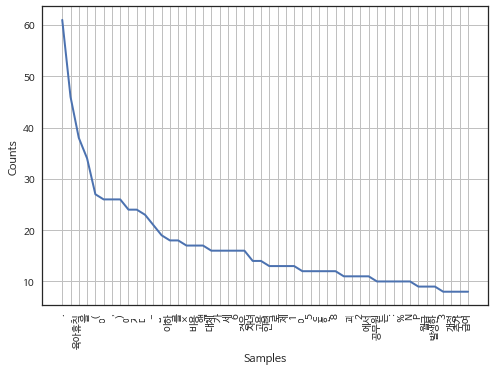

In [54]:
ko.plot(50)     # Plot sorted frequency of top 50 tokens

In [7]:
ko.count("초등학교")   # Counts occurrences

6

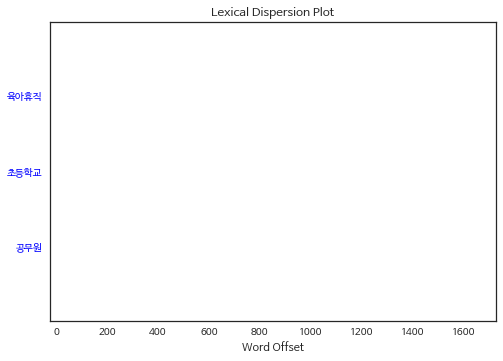

In [55]:
ko.dispersion_plot(["육아휴직", "초등학교", "공무원"]) # bug?

In [12]:
ko.concordance("초등학교")

Displaying 6 of 6 matches:
 ․ 김정훈 김학송 의원 ( 10 인 ) 제안 이유 및 주요 내용 초등학교 저학년 의 경우 에도 부모 의 따뜻한 사랑 과 보살핌 이 필요 한
 을 할 수 있는 자녀 의 나이 는 만 6 세 이하 로 되어 있어 초등학교 저학년 인 자녀 를 돌보기 위해서 는 해당 부모님 은 일자리 를 
 다 . 제 63 조제 2 항제 4 호 중 “ 만 6 세 이하 의 초등학교 취학 전 자녀 를 ” 을 “ 만 8 세 이하 ( 취학 중인 경우 
 전 자녀 를 ” 을 “ 만 8 세 이하 ( 취학 중인 경우 에는 초등학교 2 학년 이하 를 말한 다 ) 의 자녀 를 ” 로 한 다 . 부 
 . ∼ 3 . ( 현행 과 같 음 ) 4 . 만 6 세 이하 의 초등학교 취 4 . 만 8 세 이하 ( 취학 중인 경우 학 전 자녀 를 양
세 이하 ( 취학 중인 경우 학 전 자녀 를 양육 하기 위하 에는 초등학교 2 학년 이하 를 여 필요하거 나 여자 공무원 이 말한 다 ) 의


In [13]:
ko.similar("자녀")

논의


In [14]:
ko.similar("육아휴직")

In [16]:
ko.collocations()

초등학교 저학년; 육아휴직 대상자


## Tagging and chunking

In [18]:
# POS tagging
tags_ko = t.pos("작고 노란 강아지가 페르시안 고양이에게 짖었다")
tags_ko

[('작고', 'Noun'),
 ('노란', 'Adjective'),
 ('강아지', 'Noun'),
 ('가', 'Josa'),
 ('페르시안', 'Noun'),
 ('고양이', 'Noun'),
 ('에게', 'Josa'),
 ('짖었', 'Noun'),
 ('다', 'Josa')]

In [24]:
parser_ko = nltk.RegexpParser("NP: {<Adjective>*<Noun>*}")
chunks_ko = parser_ko.parse(tags_ko)
chunks_ko.pprint()

(S
  (NP 작고/Noun)
  (NP 노란/Adjective 강아지/Noun)
  가/Josa
  (NP 페르시안/Noun 고양이/Noun)
  에게/Josa
  (NP 짖었/Noun)
  다/Josa)


## Topic modeling

### Preprocessing

In [25]:
# Load documents
docs_ko = [kobill.open(i).read() for i in kobill.fileids()]

In [26]:
# Tokenize
pos = lambda d: ["/".join(p) for p in t.pos(d, stem=True, norm=True)]
texts_ko = [pos(doc) for doc in docs_ko]
print(texts_ko[0])

['하도급/Noun', '거래/Noun', '공정/Noun', '화/Suffix', '에/Josa', '관/Noun', '하다/Verb', '법률/Noun', '일부/Noun', '개정/Noun', '법률/Noun', '안/Noun', '(/Punctuation', '유선호/Noun', '의원/Noun', '대표/Noun', '발의/Noun', ')/Punctuation', '의/Noun', '안/Noun', '번/Noun', '호/Noun', '9895/Number', '발의/Noun', '연월일/Noun', ':/Punctuation', '2010/Number', './Punctuation', '11/Number', './Punctuation', '15/Number', './Punctuation', '발/Noun', '의/Noun', '자/Noun', ':/Punctuation', '유선호/Noun', '․/Foreign', '강기갑/Noun', '․/Foreign', '김효석/Noun', '조승수/Noun', 'ㆍ/Foreign', '최문순/Noun', 'ㆍ/Foreign', '조영택/Noun', '문학진/Noun', 'ㆍ/Foreign', '백재현/Noun', 'ㆍ/Foreign', '송민순/Noun', '박은수/Noun', 'ㆍ/Foreign', '정동영/Noun', 'ㆍ/Foreign', '김춘진/Noun', '김재윤/Noun', 'ㆍ/Foreign', '우윤근/Noun', 'ㆍ/Foreign', '이성남/Noun', '이종걸/Noun', '의원/Noun', '(/Punctuation', '16/Number', '인/Noun', ')/Punctuation', '제안/Noun', '이유/Noun', '및/Noun', '주요/Noun', '내용/Noun', '원/Noun', '․/Foreign', '수급/Noun', '사업자/Noun', '사이/Noun', '의/Josa', '하도급/Noun', '거래/Noun', '는/Josa', '외형/Noun', 

In [27]:
import os

intermediate_path = os.path.join("..", "intermediate")

In [31]:
# Encode tokens to integers
from gensim import corpora
dictionary_ko = corpora.Dictionary(texts_ko)
ko_dict_filepath = os.path.join(intermediate_path, "ko.dict")
dictionary_ko.save(ko_dict_filepath)  # save dictionary to file for future use

In [32]:
# Calculate TF-IDF
from gensim import models
tf_ko = [dictionary_ko.doc2bow(text) for text in texts_ko]
tfidf_model_ko = models.TfidfModel(tf_ko)
tfidf_ko = tfidf_model_ko[tf_ko]
ko_mm_filepath = os.path.join(intermediate_path, "ko.mm")
# save corpus to file for future use
corpora.MmCorpus.serialize(ko_mm_filepath, tfidf_ko)

# print first 10 elements of first document's tf-idf vector
print(tfidf_ko.corpus[0][:10])
# print top 10 elements of first document's tf-idf vector
print(sorted(tfidf_ko.corpus[0], key=lambda x: x[1], reverse=True)[:10])
# print token of most frequent element
print(dictionary_ko.get(414))

[(0, 8), (1, 3), (2, 44), (3, 4), (4, 1), (5, 1), (6, 1), (7, 2), (8, 6), (9, 3)]
[(2, 44), (204, 27), (11, 23), (32, 20), (175, 20), (237, 17), (35, 16), (31, 13), (55, 12), (68, 12)]
휴직/Noun


### Train topic models

In [34]:
# LSI
ntopics, nwords = 3, 5
lsi_ko = models.lsimodel.LsiModel(tfidf_ko, id2word=dictionary_ko,
                                  num_topics=ntopics)
print(lsi_ko.print_topics(num_topics=ntopics, num_words=nwords))

[(0, '0.518*"육아휴직/Noun" + 0.257*"만/Noun" + 0.227*"×/Foreign" + 0.214*"대체/Noun" + 0.201*"고용/Noun"'), (1, '0.449*"파견/Noun" + 0.412*"부대/Noun" + 0.267*"UAE/Alpha" + 0.243*"○/Foreign" + 0.192*"국군/Noun"'), (2, '0.326*"결혼/Noun" + 0.315*"예고/Noun" + 0.285*"손해/Noun" + 0.205*"ㆍ/Foreign" + 0.197*"원사/Noun"')]


In [35]:
# LDA
import numpy as np; np.random.seed(42)  # optional
lda_ko = models.ldamodel.LdaModel(tfidf_ko, id2word=dictionary_ko,
                                  num_topics=ntopics)
print(lda_ko.print_topics(num_topics=ntopics, num_words=nwords))

[(0, '0.002*"결혼/Noun" + 0.002*"학위/Noun" + 0.001*"육아휴직/Noun" + 0.001*"간호/Noun" + 0.001*"중개업/Noun"'), (1, '0.003*"육아휴직/Noun" + 0.002*"×/Foreign" + 0.002*"예고/Noun" + 0.002*"만/Noun" + 0.002*"대체/Noun"'), (2, '0.001*"파견/Noun" + 0.001*"육아휴직/Noun" + 0.001*"부대/Noun" + 0.001*"UAE/Alpha" + 0.001*"만/Noun"')]


In [49]:
# HDP
hdp_ko = models.hdpmodel.HdpModel(tfidf_ko, id2word=dictionary_ko)
print(hdp_ko.print_topics(num_topics=ntopics, num_words=nwords))

[(0, '0.006*선진/Noun + 0.005*근무/Noun + 0.005*조제/Noun + 0.004*작/Noun + 0.004*특/Noun'), (1, '0.005*사실/Noun + 0.004*때문/Noun + 0.004*혼자/Noun + 0.004*배/Noun + 0.004*합의/Noun'), (2, '0.005*백성운/Noun + 0.004*중대하다/Adjective + 0.004*에서/Noun + 0.004*보증/Noun + 0.004*등록/Noun')]


In [61]:
bow = tfidf_model_ko[dictionary_ko.doc2bow(texts_ko[0])]
print(sorted(lsi_ko[bow], key=lambda x: x[1], reverse=True))
print(sorted(lda_ko[bow], key=lambda x: x[1], reverse=True))
print(sorted(hdp_ko[bow], key=lambda x: x[1], reverse=True))

[(2, 0.61182879304796689), (0, 0.037507640580591452), (1, 0.033350900652715412)]
[(1, 0.92003646242967652), (2, 0.040439584848832463), (0, 0.039523952721491055)]
[(0, 0.50686504374310626), (2, 0.43560053036332824), (1, 0.018563227518726275), (3, 0.010020468671356681)]


In [52]:
bow = tfidf_model_ko[dictionary_ko.doc2bow(texts_ko[1])]
print(sorted(lsi_ko[bow], key=lambda x: x[1], reverse=True))
print(sorted(lda_ko[bow], key=lambda x: x[1], reverse=True))
print(sorted(hdp_ko[bow], key=lambda x: x[1], reverse=True))

[(0, 0.97829017893328929), (1, -0.016909513239921629), (2, -0.020121561014425936)]
[(1, 0.93609060093805785), (2, 0.032095087415082206), (0, 0.031814311646859821)]
[(0, 0.94299103395162109), (1, 0.014839950577638945), (2, 0.010860774248301503)]


## Word embedding

In [67]:
from konlpy.corpus import kobill
docs_ko = [kobill.open(i).read() for i in kobill.fileids()]

In [68]:
from konlpy.tag import Twitter; t = Twitter()
pos = lambda d: ["/".join(p) for p in t.pos(d)]
texts_ko = [pos(doc) for doc in docs_ko]

In [69]:
from gensim.models import word2vec
wv_model_ko = word2vec.Word2Vec(texts_ko)
wv_model_ko.init_sims(replace=True)
ko_word2vec_model_filepath = os.path.join(intermediate_path,
                                          "ko_word2vec.model")
wv_model_ko.save(ko_word2vec_model_filepath)

In [70]:
wv_model_ko.most_similar(pos("정부"))

[('는/Josa', 0.9997020959854126),
 ('사항/Noun', 0.9996991157531738),
 (':/Punctuation', 0.9996943473815918),
 ('비용/Noun', 0.9996904730796814),
 ('파견/Noun', 0.9996902346611023),
 ('에/Josa', 0.9996888041496277),
 ('○/Foreign', 0.9996882081031799),
 ('부대/Noun', 0.999684751033783),
 ('으로/Josa', 0.9996784925460815),
 ('국민/Noun', 0.9996776580810547)]

In [71]:
wv_model_ko.most_similar(pos("초등학교")) # bug?

[('에서/Josa', 0.9997745752334595),
 ('로/Josa', 0.9997711777687073),
 ('하는/Verb', 0.9997588992118835),
 ('년/Noun', 0.9997560381889343),
 ('경우/Noun', 0.9997530579566956),
 ('하고/Josa', 0.9997493028640747),
 ('을/Josa', 0.9997460842132568),
 ('이/Josa', 0.9997431635856628),
 ('｢/Foreign', 0.9997414946556091),
 ('에는/Josa', 0.9997392892837524)]

# Sentiment analysis for Korean movie reviews

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
train_path = os.path.join("..", "data", "korean_movie_dataset")

In [3]:
def read_data(filename):
    with open(filename, "r") as f:
        data = [line.split("\t") for line in f.read().splitlines()]
        data = data[1:]   # header 제외
    return data

train_filepath = os.path.join(train_path, "ratings_train.txt")
test_filepath = os.path.join(train_path, "ratings_test.txt")
train_data = read_data(train_filepath)
test_data = read_data(test_filepath)

In [4]:
# print the shape
print(len(train_data))      # nrows: 150000
print(len(train_data[0]))   # ncols: 3
print(len(test_data))       # nrows: 50000
print(len(test_data[0]))     # ncols: 3

150000
3
50000
3


## Data preprocessing

In [5]:
from konlpy.tag import Twitter
pos_tagger = Twitter()
def tokenize(doc):
    # norm, stem optional
    return ["/".join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]
train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
test_docs = [(tokenize(row[1]), row[2]) for row in test_data]

from pprint import pprint
pprint(train_docs[0])

(['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증/Noun',
  '나다/Verb',
  '목소리/Noun'],
 '0')


In [9]:
intermediate_path = os.path.join("..", "intermediate")

## Data exploration

In [15]:
# list of all tokens
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

2194536


In [16]:
import nltk
text = nltk.Text(tokens, name="NMSC")
print(text)

<Text: NMSC>


In [17]:
print(len(text.tokens))                 # returns number of tokens
print(len(set(text.tokens)))            # returns number of unique tokens
pprint(text.vocab().most_common(10))    # returns frequency distribution

2194536
48765
[('./Punctuation', 68630),
 ('영화/Noun', 51365),
 ('하다/Verb', 50281),
 ('이/Josa', 39123),
 ('보다/Verb', 34764),
 ('의/Josa', 30480),
 ('../Punctuation', 29055),
 ('에/Josa', 27108),
 ('가/Josa', 26696),
 ('을/Josa', 23481)]


In [17]:
# import plot libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style="white")
import matplotlib

matplotlib.rc("font", family="NanumBarunGothic")

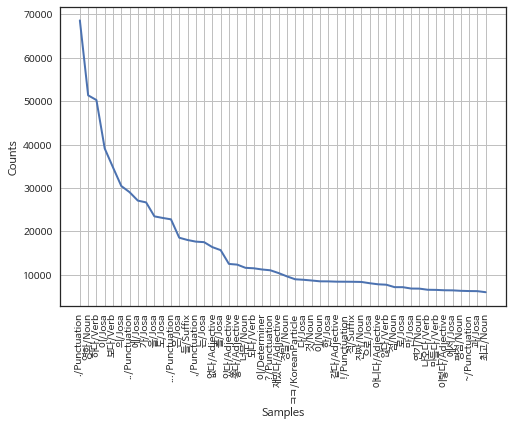

In [24]:
text.plot(50)

In [19]:
# find collocations
text.collocations()

이/Determiner 것/Noun; 적/Suffix 인/Josa; 이/Determiner 거/Noun; 안/Noun
되다/Verb; 것/Noun 은/Josa; 10/Number 점/Noun; 배우/Noun 들/Suffix; 수/Noun
있다/Adjective; 이/Noun 게/Josa; 내/Noun 가/Josa; 최고/Noun 의/Josa; 네/Suffix
요/Josa; 이/Noun 영화/Noun; 끝/Noun 까지/Josa; 들/Suffix 이/Josa; 봐/Noun
도/Josa; 때문/Noun 에/Josa; 적/Suffix 으로/Josa; 사람/Noun 들/Suffix; 영화/Noun
를/Josa


## Sentiment classification

In [20]:
selected_words = [f[0] for f in text.vocab().most_common(2000)]

In [25]:
def term_exists(doc):
    return {'exists({})'.format(word): (word in set(doc))
            for word in selected_words}

# just use part of data for fast prototype
train_docs = train_docs[:10000]
train_xy = [(term_exists(d), c) for d, c in train_docs]
test_xy = [(term_exists(d), c) for d, c in test_docs]

In [26]:
# train
classifier = nltk.NaiveBayesClassifier.train(train_xy)
# accuracy
print(nltk.classify.accuracy(classifier, test_xy))

0.80422


In [27]:
classifier.show_most_informative_features(10)

Most Informative Features
         exists(수작/Noun) = True                1 : 0      =     38.0 : 1.0
         exists(최악/Noun) = True                0 : 1      =     30.1 : 1.0
       exists(♥/Foreign) = True                1 : 0      =     24.5 : 1.0
         exists(노잼/Noun) = True                0 : 1      =     22.1 : 1.0
         exists(낭비/Noun) = True                0 : 1      =     19.5 : 1.0
        exists(쓰레기/Noun) = True                0 : 1      =     19.4 : 1.0
         exists(여운/Noun) = True                1 : 0      =     18.9 : 1.0
        exists(발연기/Noun) = True                0 : 1      =     16.9 : 1.0
          exists(굿/Noun) = True                1 : 0      =     16.9 : 1.0
        exists(최고다/Noun) = True                1 : 0      =     15.9 : 1.0


We get **80%** accuaracy.

## Sentiment classification with doc2vec

In [8]:
from collections import namedtuple
TaggedDocument = namedtuple('TaggedDocument', 'words tags')

tagged_train_docs = [TaggedDocument(d, [c]) for d, c in train_docs]
tagged_test_docs = [TaggedDocument(d, [c]) for d, c in test_docs]

In [10]:
from gensim.models import doc2vec

# make model
doc_vectorizer = doc2vec.Doc2Vec(size=300, alpha=0.025, min_alpha=0.025,
                                 seed=1234)
doc_vectorizer.build_vocab(tagged_train_docs)
# Train document vectors!
for epoch in range(10):
    doc_vectorizer.train(tagged_train_docs)
    doc_vectorizer.alpha -= 0.002  # decrease the learning rate
    # fix the learning rate, no decay
    doc_vectorizer.min_alpha = doc_vectorizer.alpha

doc2vec_filepath = os.path.join(intermediate_path, "doc2vec.model")
doc_vectorizer.save(doc2vec_filepath)

In [11]:
pprint(doc_vectorizer.most_similar("공포/Noun"))

[('공포영화/Noun', 0.4225442409515381),
 ('호러/Noun', 0.3470788300037384),
 ('서스펜스/Noun', 0.3359478712081909),
 ('스릴러/Noun', 0.31305569410324097),
 ('미스터리/Noun', 0.28936946392059326),
 ('귀신/Noun', 0.2868519425392151),
 ('무섭다/Adjective', 0.27526670694351196),
 ('긴박/Noun', 0.2727838158607483),
 ('반전/Noun', 0.27172958850860596),
 ('공포물/Noun', 0.26565778255462646)]


In [12]:
pprint(doc_vectorizer.most_similar('ㅋㅋ/KoreanParticle'))

[('ㅋㅋㄱ/KoreanParticle', 0.29859641194343567),
 ('-_-;/Punctuation', 0.2697770893573761),
 ('ㅋ/KoreanParticle', 0.25519049167633057),
 ('두준/Noun', 0.2547195851802826),
 ('뛰어오다/Verb', 0.2546490728855133),
 ('ㅡㅡ/KoreanParticle', 0.2527278959751129),
 ('~~~!!!/Punctuation', 0.2507917284965515),
 ('ㅎㅎ/KoreanParticle', 0.2468998283147812),
 ('공중전/Noun', 0.2434699535369873),
 ('광수/Noun', 0.23941215872764587)]


In [13]:
pprint(doc_vectorizer.most_similar(positive=['여자/Noun', '왕/Noun'],
                                   negative=['남자/Noun']))

[('압/Noun', 0.24126115441322327),
 ('총집/Noun', 0.23929435014724731),
 ('계집/Noun', 0.21935400366783142),
 ('케이트/Noun', 0.21905425190925598),
 ('백치/Noun', 0.2182527631521225),
 ('연기대상/Noun', 0.2169189751148224),
 ('타잔/Noun', 0.21640002727508545),
 ('기억/Noun', 0.21562068164348602),
 ('증인/Noun', 0.21540343761444092),
 ('투쟁/Noun', 0.21383601427078247)]


In [18]:
text.concordance('왕/Noun', lines=10)

Displaying 10 of 145 matches:
Josa 로맨스/Noun 냐/Josa ,,/Punctuation 왕/Noun 짜증/Noun ...../Punctuation 아주/Noun 전
/Noun 함/Noun ../Punctuation 결말/Noun 왕/Noun 실망/Noun 임/Noun 전작/Noun 에/Josa 비/Nou
nction 얼굴/Noun 만/Josa 예쁘다/Adjective 왕/Noun 되다/Verb 맞다/Verb 드라마/Noun 라도/Josa 도덕
/Noun 스릴러/Noun 임/Noun ?/Punctuation 왕/Noun 실망/Noun ./Punctuation 연기/Noun 대본/No
b 금/Noun 사인방/Noun ㅠㅠ/KoreanParticle 왕/Noun 잼/Noun 없다/Adjective ./Punctuation 정
osa 서유기/Noun 보다/Josa 희극/Noun 지/Josa 왕/Noun 이/Josa 더/Noun 최고/Noun 라/Josa 생각/Nou
접/Noun 한/Josa 걸작/Noun ./Punctuation 왕/Noun ,/Punctuation 너무/Noun 감동/Noun 적/Suf
Josa 온/Noun 거/Noun 처럼/Noun 제나라/Noun 왕/Noun 과/Josa 군사/Noun 들/Suffix 을/Josa 속이다/
다/Verb ./Punctuation 기대하다/Adjective 왕/Noun 지루/Noun .../Punctuation 제니퍼/Noun 틸리
tive 움/Noun 짜증/Noun .../Punctuation 왕/Noun 짜증/Noun ../Punctuation 사람/Noun 마다/J


In [19]:
train_x = [doc_vectorizer.infer_vector(doc.words) for doc in tagged_train_docs]
train_y = [doc.tags[0] for doc in tagged_train_docs]
len(train_x)

150000

In [20]:
len(train_x[0])

300

In [21]:
test_x = [doc_vectorizer.infer_vector(doc.words) for doc in tagged_test_docs]
test_y = [doc.tags[0] for doc in tagged_test_docs]
print(len(test_x))
print(len(test_x[0]))

50000
300


In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1234)
classifier.fit(train_x, train_y)
classifier.score(test_x, test_y)

0.63458000000000003

Not good compare with the classic classification!